In [1]:
# Load the modules
import json
import numpy as np
import pandas as pd
from MERFISH_probe_design.hamming_codes import code_selection, hamming_code_analysis
import MERFISH_probe_design.codebook_design.codebook_design_stochastic as cds
import MERFISH_probe_design.IO.file_io as fio

In [2]:
# Define all the input files you need in this script
target_genes_file = 'temporary_data/selected_genes_for_merfish.csv'
code_list_file = 'temporary_data/design_outputs/HM4_codes_27.json'
cluster_gene_exp_file = 'temporary_data/selected_genes_cell_type_mean_exp.parquet'

# Define the output files
codebook_file = 'temporary_data/design_outputs/codebook.txt'

In [3]:
target_genes_df = pd.read_csv(target_genes_file, index_col=0)
target_genes = sorted(target_genes_df['gene_name'].values)
assert(len(target_genes) == len(np.unique(target_genes)))
target_genes_df

,gene_name,mean_exp_measured,mean_exp_decoded,max_ct_exp_measured,max_ct_exp_decoded,entropy_measured,entropy_decoded,corr,mean,std,annotation,mane_transcript,mane_transcript_version_free,transcript_count,mane_transcript_exp,gene_total_exp,mane_transcript_relative_exp,n_specific_probes,n_max_no_overlap_specific_probes
gene_id,,,,,,,,,,,,,,,,,,,
ENSG00000106571,GLI3,0.260195,0.072583,2.474132,1.312467,5.566829,5.873006,0.532793,0.065269,0.143058,mixed cell types,ENST00000395925.8,ENST00000395925,16,4.25,95.88,0.044326,3320,181
ENSG00000103460,TOX3,0.234072,0.115345,2.385234,1.771106,5.788746,5.841043,0.607521,0.083844,0.194156,mixed cell types,ENST00000219746.14,ENST00000219746,8,6.35,43.48,0.146044,1033,57
ENSG00000151702,FLI1,0.230650,0.184101,2.863053,1.811418,5.479093,5.790850,0.906908,0.222315,0.348677,mixed cell types,ENST00000527786.7,ENST00000527786,15,22.17,230.92,0.096007,1318,76
ENSG00000175745,NR2F1,0.202714,0.171901,1.927098,2.180577,5.745077,5.789132,0.691385,0.149279,0.311976,mixed cell types,ENST00000327111.8,ENST00000327111,7,68.99,486.81,0.141719,733,52
ENSG00000178662,CSRNP3,0.197304,0.158719,1.598149,1.566633,5.674730,5.866014,0.775040,0.119171,0.236080,neuronal,ENST00000651982.1,ENST00000651982,12,14.40,52.01,0.276870,2255,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000109705,NKX3-2,0.001579,0.004230,0.463101,0.408199,2.583972,5.325474,0.920417,0.004682,0.032597,Hox genes,ENST00000382438.6,ENST00000382438,1,123.68,123.68,1.000000,631,42
ENSG00000214336,FOXI3,0.001568,0.002001,0.236452,0.023135,3.026150,6.385923,0.137640,0.001764,0.004771,others,ENST00000428390.3,ENST00000428390,1,5.57,5.57,1.000000,729,48
ENSG00000166509,CLEC3A,0.001525,0.002898,0.479080,0.312405,2.176721,5.724435,0.833271,0.003805,0.042121,bone,ENST00000299642.10,ENST00000299642,4,37.65,87.69,0.429353,589,31


In [4]:
# Load a list of HM4 codes
with open(code_list_file, 'r') as f:
    code_list = json.load(f)
print(f'Loaded {len(code_list)} HM4 codes.')
    
code_length = 27

Loaded 606 HM4 codes.


In [5]:
# Selec a subset of codes that evenly cover the bits
# Select the codes for genes
N_genes = len(target_genes)
gene_codes, rest_codes = code_selection.find_subset_code_even_coverage(code_list, code_length, N_genes, N_rounds=20)

# Select blank barcodes randomly
N_blank = 50
np.random.shuffle(rest_codes)
blank_codes = rest_codes[:N_blank]

Round = 1, variance = 0.22222222222222218
Round = 2, variance = 0.22222222222222218
Round = 3, variance = 0.22222222222222218
Round = 4, variance = 0.22222222222222218
Round = 5, variance = 0.22222222222222218
Round = 6, variance = 0.22222222222222218
Round = 7, variance = 0.22222222222222218
Round = 8, variance = 0.22222222222222218
Round = 9, variance = 0.22222222222222218
Round = 10, variance = 0.22222222222222218
Round = 11, variance = 0.22222222222222218
Round = 12, variance = 0.22222222222222218
Round = 13, variance = 0.22222222222222218
Round = 14, variance = 0.22222222222222218
Round = 15, variance = 0.22222222222222218
Round = 16, variance = 0.22222222222222218
Round = 17, variance = 0.22222222222222218
Round = 18, variance = 0.22222222222222218
Round = 19, variance = 0.22222222222222218
Round = 20, variance = 0.22222222222222218


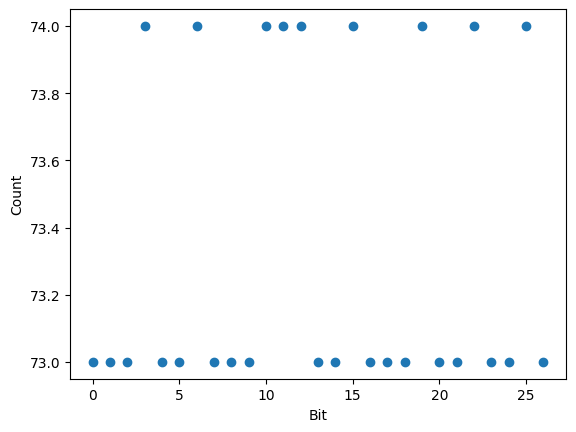

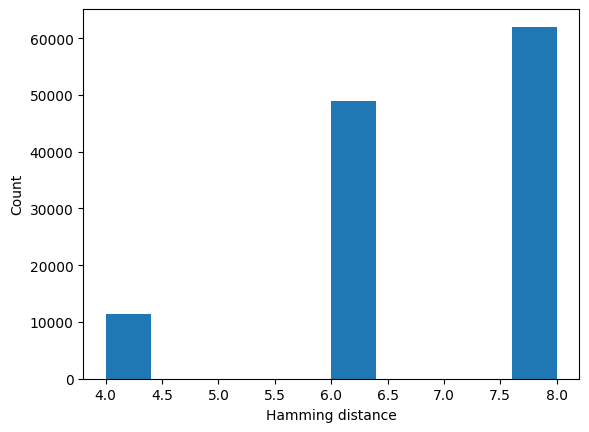

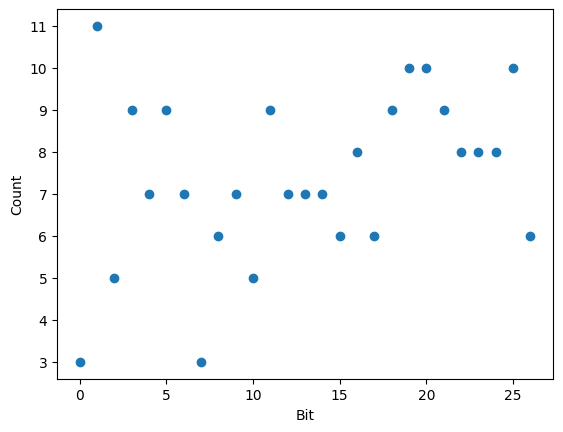

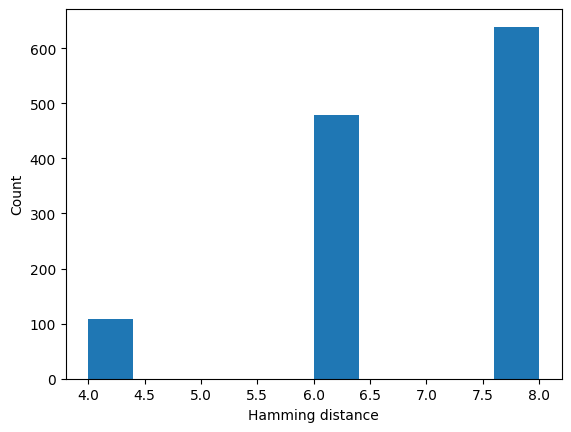

In [6]:
# Plot distributions of gene codes
hamming_code_analysis.plot_bit_coverage(gene_codes, code_length)
hamming_code_analysis.plot_pairwise_hamming_distance_distribution(gene_codes)
# Plot distributions of blank codes
hamming_code_analysis.plot_bit_coverage(blank_codes, code_length)
hamming_code_analysis.plot_pairwise_hamming_distance_distribution(blank_codes)

In [7]:
# Load the gene expressions for each cell cluster.
# This is a matrix of shape N_clusters x N_genes_of_interest.
# Each element is the expression level of a gene in a cluster.
cluster_gene_exp = pd.read_parquet(cluster_gene_exp_file)[target_genes].values

# Normalize the expressions, such that the sum of all expressions are N_clusters.
# The normalization is important for the subsequent simulated annealing.
cluster_gene_exp_normalized = cluster_gene_exp / np.sum(cluster_gene_exp) * cluster_gene_exp.shape[0]

In [8]:
# Define the cluster sizes to be the same
cluster_sizes = np.ones(cluster_gene_exp.shape[0])

# Log normalize the cluster sizes
cluster_sizes_log_normalized = np.log(cluster_sizes + 1) / np.sum(np.log(cluster_sizes + 1))

In [9]:
# Convert the gene codes to binary codes
gene_binary_codes = np.array([cds.on_bits_to_binary_code(c, code_length) for c in gene_codes])

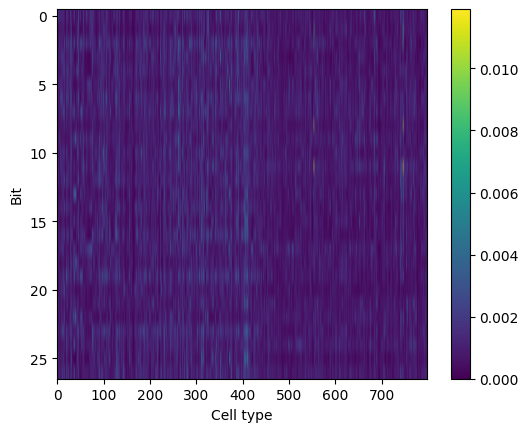

In [10]:
# Plot the distribution of numbers of bright dots in cells before optimization
# The values have the unit dot per million transcripts
cds.plot_dot_distribution(cluster_gene_exp, gene_binary_codes)

In [11]:
from importlib import reload
reload(cds)
# Optimize the code assigment to let cells have evenly distributed dots for each bit
# Use the log of cluster sizes to weight the divergence which we want to minimize
best_score, best_codes = cds.optimize_bit_assignments_simulated_annealing_parallel(
    cluster_gene_exp_normalized, cluster_sizes_log_normalized, gene_binary_codes,
    N_test=64, N_threads=16, N_rounds=5, N_iter=20000)

Simulated annealing finished with best score = 0.003684238173331814.
Simulated annealing finished with best score = 0.0036798974721968937.
Simulated annealing finished with best score = 0.003655259991531403.
Simulated annealing finished with best score = 0.003678605857145443.
Simulated annealing finished with best score = 0.0035994237006429595.
Simulated annealing finished with best score = 0.0036902396398465096.
Simulated annealing finished with best score = 0.0035995383562332298.
Simulated annealing finished with best score = 0.0036206665823486175.
Simulated annealing finished with best score = 0.003639243876024675.
Simulated annealing finished with best score = 0.0036135989281843948.
Simulated annealing finished with best score = 0.0036333445261343645.
Simulated annealing finished with best score = 0.0036801376193515106.
Simulated annealing finished with best score = 0.0036493485851477937.
Simulated annealing finished with best score = 0.0036831950432146578.
Simulated annealing fini

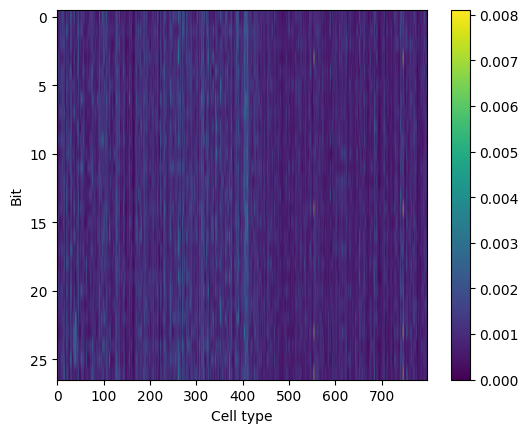

In [12]:
# The dot distribution is better now.
# There are vertical strip patterns that our optimization didn't change. 
# This is because we can only optimize the distribution across bits.
# The total number of bright dots for each cell type is always 4 x N_expressed_transcripts.
cds.plot_dot_distribution(cluster_gene_exp, best_codes)

In [13]:
readout_df = pd.read_csv('temporary_data/selected_readouts.csv')[:code_length]
readout_df

,id,readout_seq,readout_seq_rc,adaptor_color,adaptor_seq
0,NDB826,ATATGTCGATGTCCTTAGAC,GTCTAAGGACATCGACATAT,750nm,ATATGTCGATGTCCTTAGACTTTGCACTGCCGTCCTTGACTTTGCA...
1,NDB755,TGCGACATGTTATGCTAGGC,GCCTAGCATAACATGTCGCA,647nm,TGCGACATGTTATGCTAGGCGATCCGATTGGAACCGTCCCGATCCG...
2,NDB759,TGACTGTCGTTGACTCTCGG,CCGAGAGTCAACGACAGTCA,565nm,TGACTGTCGTTGACTCTCGGTGCGAACTGTCCGGCTTTCATGCGAA...
3,NDB376,GACTTTGTGGGTACGTTGAT,ATCAACGTACCCACAAAGTC,750nm,GACTTTGTGGGTACGTTGATTTTGCACTGCCGTCCTTGACTTTGCA...
4,NDB578,AGGCGATACATGAGAGGCGT,ACGCCTCTCATGTATCGCCT,647nm,AGGCGATACATGAGAGGCGTGATCCGATTGGAACCGTCCCGATCCG...
5,NDB795,GGGCGTCTGTTACACGTTTG,CAAACGTGTAACAGACGCCC,565nm,GGGCGTCTGTTACACGTTTGTGCGAACTGTCCGGCTTTCATGCGAA...
6,NDB865,GATCCCGGTCGGATATGTGA,TCACATATCCGACCGGGATC,750nm,GATCCCGGTCGGATATGTGATTTGCACTGCCGTCCTTGACTTTGCA...
7,NDB713,GGTGGTTGTCACTTTCCGAA,TTCGGAAAGTGACAACCACC,647nm,GGTGGTTGTCACTTTCCGAAGATCCGATTGGAACCGTCCCGATCCG...
8,NDB777,CGGCGAATTTGCTTTCGTTA,TAACGAAAGCAAATTCGCCG,565nm,CGGCGAATTTGCTTTCGTTATGCGAACTGTCCGGCTTTCATGCGAA...
9,NDB817,GAACTCGTTGACTAAGCATT,AATGCTTAGTCAACGAGTTC,750nm,GAACTCGTTGACTAAGCATTTTTGCACTGCCGTCCTTGACTTTGCA...


In [14]:
# Get the names of the bits
readout_df['id'].values[:code_length]

<ArrowStringArray>
['NDB826', 'NDB755', 'NDB759', 'NDB376', 'NDB578', 'NDB795', 'NDB865',
 'NDB713', 'NDB777', 'NDB817', 'NDB533', 'NDB801', 'NDB652', 'NDB725',
 'NDB807', 'NDB718', 'NDB710', 'NDB690', 'NDB847', 'NDB971', 'NDB699',
 'NDB760', 'NDB743', 'NDB936', 'NDB400', 'NDB683', 'NDB456']
Length: 27, dtype: str

In [15]:
# The names of MERFISH readout probes
bit_names = ['NDB826', 'NDB755', 'NDB759', 'NDB376', 'NDB578', 'NDB795', 'NDB865',
       'NDB713', 'NDB777', 'NDB817', 'NDB533', 'NDB801', 'NDB652', 'NDB725',
       'NDB807', 'NDB718', 'NDB710', 'NDB690', 'NDB847', 'NDB971', 'NDB699',
       'NDB760', 'NDB743', 'NDB936', 'NDB400', 'NDB683', 'NDB456']

In [16]:
# Get a list of gene names including the blank barcodes
gene_names = [f'Blank-{i + 1}' for i in range(N_blank)] + list(target_genes)

# Get a list of transcript names including the blank barcodes
transcript_names = [f'' for i in range(N_blank)] + list(
    target_genes_df.set_index('gene_name').loc[target_genes]['mane_transcript'].values)

# Convert the barcodes into strings of '1' and '0'.
barcode_binarys = [cds.on_bits_to_binary_code(c, code_length) for c in blank_codes] + list(best_codes)
barcode_strings  = [''.join([str(b) for b in c]) for c in barcode_binarys]

# Write the codebook
fio.write_merlin_codebook(codebook_file, '1.0', 'TEST', bit_names, gene_names, transcript_names, barcode_strings)